In [24]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# As of the writing of this, I am using seaborn version '0.12.2'
sns.__version__

## [Pointplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot)

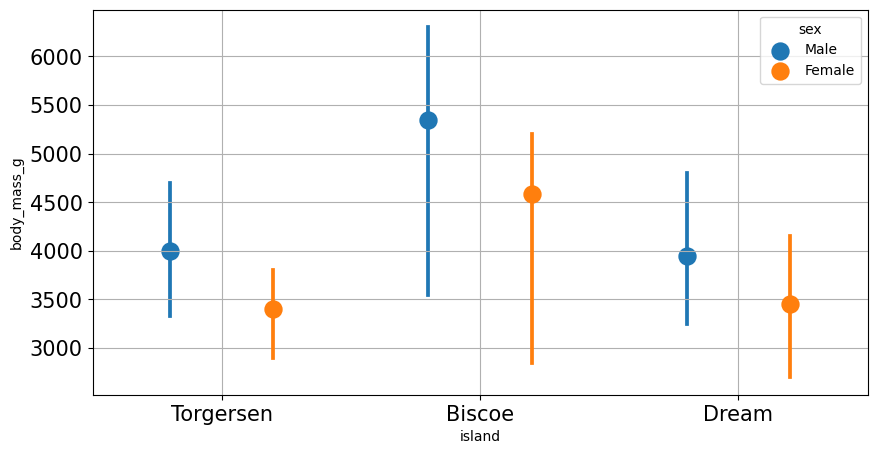

In [31]:
df = sns.load_dataset("penguins")

"""
This is a super simple function to demonstrate usage
"""
def get_mean(vec):
    return np.median(vec)

def get_error_bar(vec):
    return (vec.min(), vec.max())

fig, ax = plt.subplots(figsize=(10, 5))

sns.pointplot(
    data=df, 
    x="island", y="body_mass_g", hue='sex', 
    estimator=get_mean, errorbar=get_error_bar, 
    join=False, scale=1.5, dodge=0.4,
    ax=ax
)

ax.tick_params(axis="both", which="major", labelsize=15)
ax.grid(True)
plt.show()

## [JointGrid](https://seaborn.pydata.org/generated/seaborn.JointGrid.html)

Also see: https://www.youtube.com/watch?v=t3G078DWXBM

Text(0.5, 0.98, 'Example')

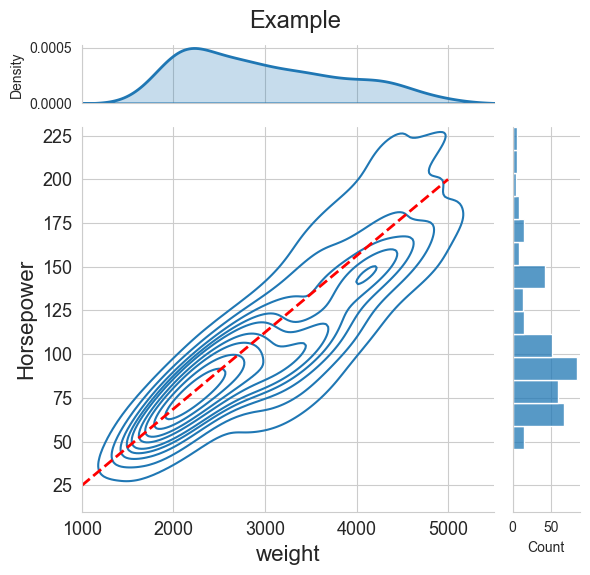

In [60]:
sns.set_style("whitegrid")
df = sns.load_dataset("mpg")
g = sns.JointGrid(xlim=(1000, 5500), ylim=(10, 230), marginal_ticks=True)

x, y = df["weight"], df["horsepower"]

sns.kdeplot(x=x, y=y, ax=g.ax_joint)
# sns.scatterplot(x=x, y=y, ax=g.ax_joint, alpha=0.2)

sns.kdeplot(x=x, fill=True, linewidth=2, ax=g.ax_marg_x)
sns.histplot(y=y, ax=g.ax_marg_y)

g.set_axis_labels(xlabel='weight', ylabel = 'Horsepower', fontsize=16)
g.ax_joint.plot([1000, 5000], [25, 200], c='r', lw=2, linestyle='--')

g.fig.tight_layout(rect=[0, 0.03, 1, 0.95])
g.fig.suptitle(f"Example", fontsize=17)

### [FacetGrid](https://www.youtube.com/watch?v=YYeqJllXHxM&list=PLtPIclEQf-3cG31dxSMZ8KTcDG7zYng1j&index=18)

In [81]:
sns.__version__

'0.12.2'

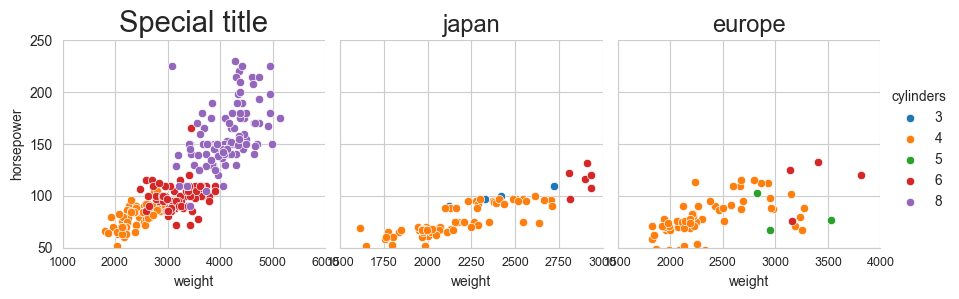

In [86]:
# help(sns.FacetGrid)
g = sns.FacetGrid(
    df, 
    col='origin', ylim=(50, 250), hue='cylinders', sharex=False,
    height=5, aspect=1.2 # controls size of figure
)

g.map_dataframe(sns.scatterplot, x="weight", y='horsepower')
g.set_titles(col_template='{col_name}', size=17) # note: not fontsize
# g.facet_axis(0, 0).set_title('Special title', fontsize=21)

g.set_axis_labels(xlabel='weight', ylabel = 'Horsepower', fontsize=16)
g.set_xticklabels(fontsize=9)
g.add_legend()